# Demonstration of GPEP usage
This Jupyter notebook shows how to download a test case from Zenodo and run the test case on a local computer using several configuration templates contained in the repo. Before running this notebook, users should (1) clone the GPEP repo to their own computer, and (2) install relevant packages using requirements.txt or environment.yml which are introduced in the README.md of the GPEP repo.   

Note: All experiments happen in the folder **../../GPEP_test_cases**

In [1]:
# Load modules
import subprocess, os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr

# 1. Download/Prepare test cases
The test cases used in the GPEP paper are open access on Zenodo. A script (./tools/get_testcases.py) can be used to directly download the test cases without the need of usernames or passwords.   

In [2]:
# we set the outpath as "../../GPEP_test_cases"
# two test cases are available: cali2017 (0) and UpCO_SWE (1). here we download "0" which representing California 2017 precipitation and temperature

if os.path.isdir('../../GPEP_test_cases/cali2017'):
    print('Test cases have been downloaded. Skip downloading')
else:
    _ = subprocess.run('python ../tools/get_testcases.py -o ../../GPEP_test_cases -n 0', shell=True)
    # rename the original outputs from the downloaded test cases to prevent confusion with the newly generated outputs
    _ = subprocess.run('mv ../../GPEP_test_cases/cali2017/outputs/ ../../GPEP_test_cases/cali2017/outputs_FromDownload', shell=True)

Test cases have been downloaded. Skip downloading


## For users who need to a new case from scratch
We recommend that users follow the file format in the test case `../../GPEP_test_cases/cali2017`. The important files are:  
- CALI.gridinfo.0625_v3.nc: This is the `infile_grid_domain` parameter in the configuration file. This file contains geographic and topographic information such as latitude, longitude, elevation, and slope. This file also defines the domain where the geospatial estimation will be performed.   
- CALI.screened_stn_list_slope.v3.csv: This is the `input_stn_list` parameter in the configuration file. This file contains the list of stations that will be used in spatial estimation.   
- stndata: This folder contains station files defined in CALI.screened_stn_list_slope.v3.csv.  
- gridded_datafile_list.txt: This is the `dynamic_predictor_filelist` parameter in the configuration file. This file contains the list of dynamic gridded data that will be used in spatial estimation.  
- griddata: This folder contains files defined in gridded_datafile_list.txt.  

Note: The format of those files including netcdf and CSV files are introduced in the `./docs/How_to_create_config_files.md` file. This file is can be treated as the user manual because everything of GPEP is controlled using this configuration file. 

# 2. Run test cases
To execute GPEP, simply use the command: `python main.py /your/path/config_filename.toml`. All configurations, including input/output files, formats, and model parameters, are specified in this configuration file.  

We provide templates for configuration files in the `./config_templates` directory. Those templates are used to run the test cases in this notebook. We recommend users start with these templates to set up their own cases. For detailed information on GPEP parameters, their meanings, and acceptable values, refer to the guide `./docs/How_to_create_config_files.md`. The examples of running the test case are shown as below using different files from `./config_templates`.   

## 2.1 Regression using static predictors

Note: The initial run (here, the static predictor experiment is the initial run)  may take a longer time as it generates foundational outputs, such as the creation of the 'spcorr outfile' (representing the spatial correlation structure). This file only needs to be produced once, ensuring subsequent runs are significantly faster.

In [3]:
# Run the test case
_ = subprocess.run('python ../src/main.py ../config_templates/testcase.config.static.toml', shell=True)

##################################################
Configuration file: ../config_templates/testcase.config.static.toml
################################################## 


##################################################
Merging individual station files to one single file
##################################################
Input station list:      /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/inputs/CALI.screened_stn_list_slope.v3.csv
Input station folder:    /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/inputs/stndata
Output station file:     /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/outputs/stn_info/all_station_data.nc
Target variables:        ['prcp', 'tmin', 'tmax']
A merged station data file does not exist: reading station information from individual files
Number of input station: 1219
Time steps:              28
Start merging station data ... 
trange st

## 2.2 Regression using dynamic predictors

In [4]:
# Run the test case
_ = subprocess.run('python ../src/main.py ../config_templates/testcase.config.dynamic.toml', shell=True)

##################################################
Configuration file: ../config_templates/testcase.config.dynamic.toml
################################################## 


##################################################
Merging individual station files to one single file
##################################################
Input station list:      /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/inputs/CALI.screened_stn_list_slope.v3.csv
Input station folder:    /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/inputs/stndata
Output station file:     /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/outputs/stn_info/all_station_data.nc
Target variables:        ['prcp', 'tmin', 'tmax']
NOTE: Merged station file exists
overwrite_merged_stnfile is False. Skip station merging.

##################################################
Get near station information
####################

## 2.3 Random forest regression 
This provides an example just for precipitation regression without probabilistic estimation which meets the needs of some users 

In [5]:
# Run the test case
_ = subprocess.run('python ../src/main.py ../config_templates/testcase.config.RF.toml', shell=True)

##################################################
Configuration file: ../config_templates/testcase.config.RF.toml
################################################## 


##################################################
Merging individual station files to one single file
##################################################
Input station list:      /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/inputs/CALI.screened_stn_list_slope.v3.csv
Input station folder:    /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/inputs/stndata
Output station file:     /glade/u/home/guoqiang/GMET_repos/GPEP/config_templates/../../GPEP_test_cases/cali2017/outputs/stn_info/all_station_data.nc
Target variables:        ['prcp']
NOTE: Merged station file exists
overwrite_merged_stnfile is False. Skip station merging.

##################################################
Get near station information
#########################################

# 3. Visualize test case outputs
Several ensemble members are plotted here. The `./tools/` folder provides more examples. The data are based on outputs from "2. Run test cases" in this notebook.    

## 3.1 Visualize results from regression using static predictors (Section 2.1)

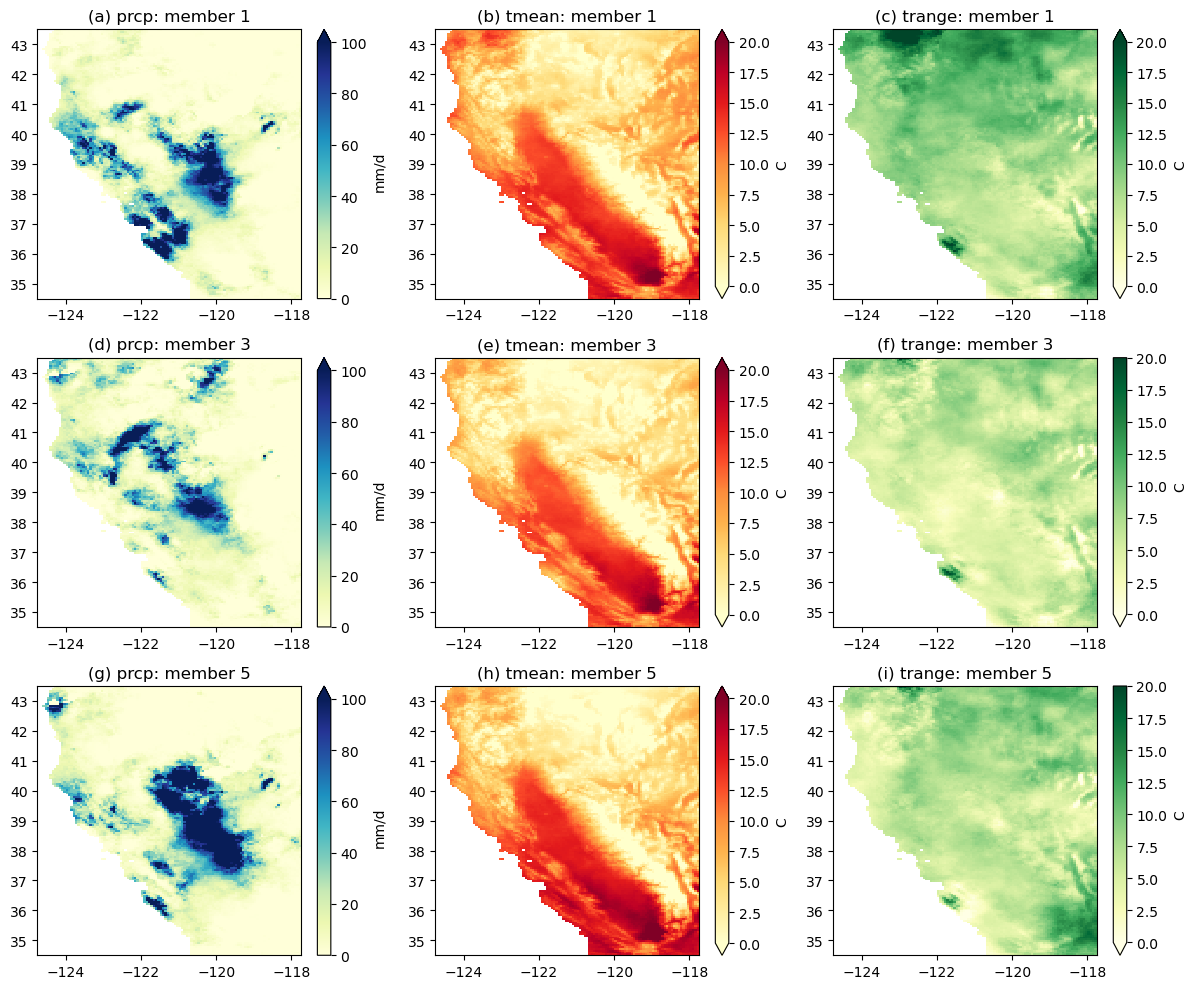

In [6]:
ens = [1, 3, 5]
varnames = ['prcp','tmean','trange']
date = '2017-02-10'
vmins = [0, 0, 0]
vmaxs = [100, 20, 20]

norm = mcolors.LogNorm(vmins[0], vmaxs[0])

cmaps = ['YlGnBu', 'YlOrRd', 'YlGn']
units = ['mm/d', 'C', 'C']

titles = [ [f'(a) prcp: member {ens[0]}', f'(b) tmean: member {ens[0]}', f'(c) trange: member {ens[0]}'], 
           [f'(d) prcp: member {ens[1]}', f'(e) tmean: member {ens[1]}', f'(f) trange: member {ens[1]}'], 
           [f'(g) prcp: member {ens[2]}', f'(h) tmean: member {ens[2]}', f'(i) trange: member {ens[2]}'] ]

fig, axs = plt.subplots(len(varnames), len(ens), figsize=[12, 10])

for i in range(len(varnames)):
    for j in range(len(ens)):
        fileij = f'../../GPEP_test_cases/cali2017/outputs/ensembles/LWLRstatic_ensMember_20170201-20170210_{ens[j]:03}.nc'
        dsij = xr.open_dataset(fileij)
        
        dsij = dsij[varnames[i]].sel(time=date)
        
        axij = axs[j,i]
        dsij.plot(ax=axij, vmin=vmins[i], vmax=vmaxs[i], cmap=cmaps[i], cbar_kwargs={'label':units[i]})
        axij.set_title(titles[j][i])
        axij.set_xlabel('')
        axij.set_ylabel('')

plt.tight_layout()
plt.show()

## 3.2 Visualize results from regression using dynamic predictors (Section 2.2)

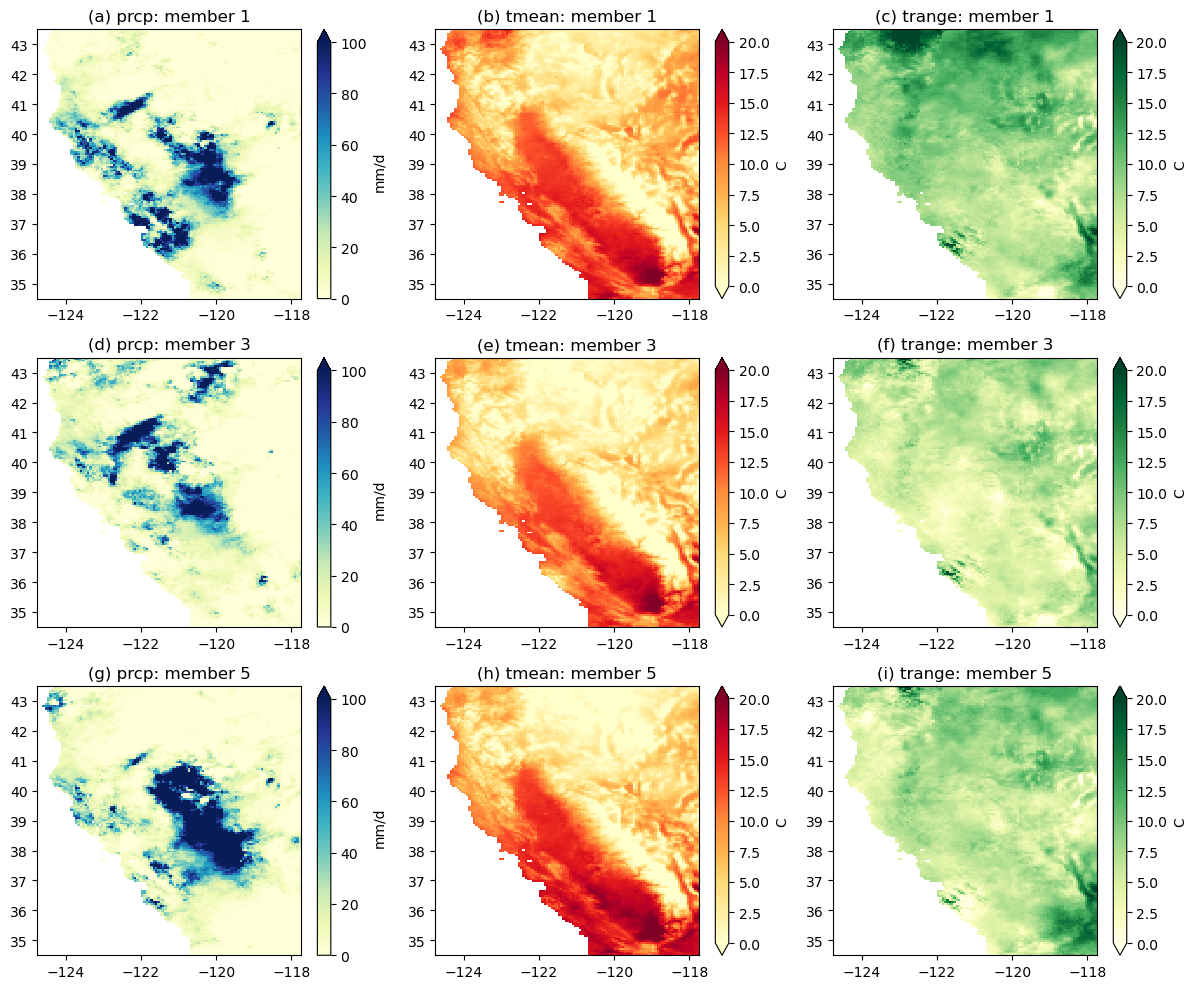

In [7]:
ens = [1, 3, 5]
varnames = ['prcp','tmean','trange']
date = '2017-02-10'
vmins = [0, 0, 0]
vmaxs = [100, 20, 20]

norm = mcolors.LogNorm(vmins[0], vmaxs[0])

cmaps = ['YlGnBu', 'YlOrRd', 'YlGn']
units = ['mm/d', 'C', 'C']

titles = [ [f'(a) prcp: member {ens[0]}', f'(b) tmean: member {ens[0]}', f'(c) trange: member {ens[0]}'], 
           [f'(d) prcp: member {ens[1]}', f'(e) tmean: member {ens[1]}', f'(f) trange: member {ens[1]}'], 
           [f'(g) prcp: member {ens[2]}', f'(h) tmean: member {ens[2]}', f'(i) trange: member {ens[2]}'] ]

fig, axs = plt.subplots(len(varnames), len(ens), figsize=[12, 10])

for i in range(len(varnames)):
    for j in range(len(ens)):
        fileij = f'../../GPEP_test_cases/cali2017/outputs/ensembles/LWLRdynamic_ensMember_20170201-20170210_{ens[j]:03}.nc'
        dsij = xr.open_dataset(fileij)
        
        dsij = dsij[varnames[i]].sel(time=date)
        
        axij = axs[j,i]
        dsij.plot(ax=axij, vmin=vmins[i], vmax=vmaxs[i], cmap=cmaps[i], cbar_kwargs={'label':units[i]})
        axij.set_title(titles[j][i])
        axij.set_xlabel('')
        axij.set_ylabel('')

plt.tight_layout()
plt.show()

## 3.3 Visualize results from random forest (Section 2.3)

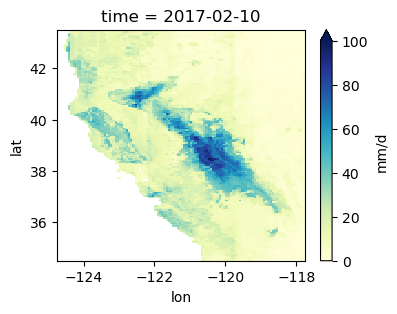

In [8]:
ds = xr.open_dataset('../../GPEP_test_cases/cali2017/outputs/regression/simpleRF_grid_regression_20170201-20170210.nc')
date = '2017-02-10'

fig, axs = plt.subplots(figsize=[4, 3])
ds['prcp'].sel(time=date).plot(vmin=0, vmax=100, cmap='YlGnBu',cbar_kwargs={'label':'mm/d'})
plt.show()